In [145]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
data = pd.read_csv('nyc_taxis.csv', delimiter=',', header=0, index_col=0)
len(data)

1458644

In [93]:
pickup_datetime_update = data['pickup_datetime'].astype('datetime64[ns]')
dropoff_datetime_update = data['dropoff_datetime'].astype('datetime64[ns]')
data['pickup_datetime'] = pickup_datetime_update
data['dropoff_datetime'] = dropoff_datetime_update
pickup_time = data['pickup_datetime'][0]
dropoff_time = data['dropoff_datetime'][0]

def to_seconds(duration):
    return duration.total_seconds()

travel_time =  data['dropoff_datetime'].sub(data['pickup_datetime'], axis = 0)

data['travel_time'] = travel_time

data['travel_time'] = data['travel_time'].apply(to_seconds)

data.head(5)
data.dtypes

vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
travel_time                  float64
dtype: object

In [77]:
# site to find coordinates of places
# https://www.distancesto.com/coordinates/us/empire-state-building-latitude-longitude/history/477798.html

In [66]:
import reverse_geocoder as rg
import pprint

def reverseGeocode(coordinates):
    result = rg.search(coordinates)
     
    # result is a list containing ordered dictionary.
    pprint.pprint(result)

In [72]:
# coordinates for Empire State Building
reverseGeocode((40.748541, -73.985758))

[{'admin1': 'New York',
  'admin2': 'Queens County',
  'cc': 'US',
  'lat': '40.74482',
  'lon': '-73.94875',
  'name': 'Long Island City'}]


In [73]:
# coordinates for JFK AIRPORT
reverseGeocode((40.647352,  -73.790534))

[{'admin1': 'New York',
  'admin2': 'Queens County',
  'cc': 'US',
  'lat': '40.69149',
  'lon': '-73.80569',
  'name': 'Jamaica'}]


In [74]:
# coordinates for NEWARK LIBERTY AIRPORT
reverseGeocode((40.704197,  -74.190124))

[{'admin1': 'New Jersey',
  'admin2': 'Essex County',
  'cc': 'US',
  'lat': '40.73566',
  'lon': '-74.17237',
  'name': 'Newark'}]


In [118]:
data_JFK = data[abs(data['pickup_latitude'] -  40.748541) <= 0.009999]
data_JFK = data_JFK[abs(data_JFK['pickup_longitude'] + 73.985758) <= 0.009999]
data_JFK = data_JFK[abs(data_JFK['dropoff_latitude'] - 40.647352) <= 0.009999]
data_JFK = data_JFK[abs(data_JFK['dropoff_longitude'] + 73.790534) <= 0.009999]

data_JFK

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id3930440,1,2016-06-01 14:29:00,2016-06-01 15:44:28,1,-73.987869,40.748219,-73.783760,40.643600,N,4528
id1365474,1,2016-04-26 16:24:10,2016-04-26 17:24:13,1,-73.992050,40.751514,-73.790039,40.646957,N,3603
id3401826,1,2016-04-27 10:20:02,2016-04-27 11:01:32,2,-73.992538,40.756557,-73.789757,40.643002,N,2490
id1909463,1,2016-03-27 10:13:49,2016-03-27 10:41:50,2,-73.990303,40.756023,-73.788696,40.647415,N,1681
id3861834,1,2016-05-09 16:24:51,2016-05-09 17:29:44,2,-73.978928,40.745937,-73.790367,40.646748,N,3893
...,...,...,...,...,...,...,...,...,...,...
id3391338,1,2016-02-04 07:27:03,2016-02-04 08:22:55,2,-73.983658,40.741978,-73.785950,40.643456,N,3352
id1998730,1,2016-05-02 23:08:40,2016-05-02 23:50:33,1,-73.989410,40.756855,-73.782135,40.644287,N,2513
id1829774,2,2016-04-01 17:12:44,2016-04-01 18:20:34,1,-73.978088,40.753063,-73.783386,40.643768,N,4070


In [149]:
times = pd.DatetimeIndex(data_JFK.pickup_datetime)
grouped_by_hour = data_JFK.groupby([times.hour]).mean()/(60*60)
average_trip_time = list(grouped_by_hour['trip_duration'])
pickup_hours = list(range(0, 24))

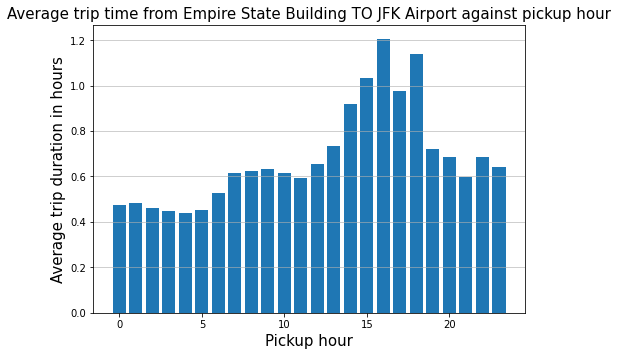

In [153]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(pickup_hours, average_trip_time)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Pickup hour',fontsize=15)
plt.ylabel('Average trip duration in hours',fontsize=15)
plt.title('Average trip time from Empire State Building TO JFK Airport against pickup hour',fontsize=15)
plt.show()

In [171]:
data_Newark = data[abs(data['pickup_latitude'] -  40.748541) <= 0.009999]
data_Newark = data_Newark[abs(data_Newark['pickup_longitude'] + 73.985758) <= 0.009999]
data_Newark = data_Newark[abs(data_Newark['dropoff_latitude'] - 40.704197) <= 0.009999]
data_Newark = data_Newark[abs(data_Newark['dropoff_longitude'] + 74.190124) <= 0.009999]

data_Newark

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id1938148,1,2016-05-05 05:04:30,2016-05-05 05:30:56,4,-73.987572,40.755486,-74.185478,40.694221,N,1586
id0922516,1,2016-04-14 17:42:41,2016-04-14 18:32:34,2,-73.985268,40.741959,-74.188423,40.695454,N,2993
id1024232,2,2016-05-29 13:22:50,2016-05-29 14:01:47,1,-73.984085,40.746181,-74.180962,40.695114,N,2337
id2930052,2,2016-03-26 13:28:12,2016-03-26 14:01:03,1,-73.976532,40.752068,-74.183891,40.700661,N,1971
id3302698,1,2016-02-07 20:44:28,2016-02-07 21:09:56,1,-73.995567,40.750332,-74.184097,40.696411,N,1528
id3774443,2,2016-03-24 02:49:53,2016-03-24 03:14:40,1,-73.992813,40.748081,-74.186218,40.697731,N,1487
id0018553,1,2016-03-09 05:03:15,2016-03-09 05:23:31,2,-73.992096,40.748821,-74.187927,40.696171,N,1216
id1831880,1,2016-03-20 13:57:33,2016-03-20 14:26:04,1,-73.982964,40.757057,-74.181496,40.705097,N,1711
id0503169,2,2016-01-19 12:09:52,2016-01-19 12:46:29,1,-73.977722,40.754810,-74.181709,40.694752,N,2197


In [174]:
times = pd.DatetimeIndex(data_Newark.pickup_datetime)
grouped_by_hour = data_Newark.groupby([times.hour]).mean()/(60*60)
average_trip_time_Newark = list(grouped_by_hour['trip_duration'])
pickup_hours_Newark = list(grouped_by_hour.index)

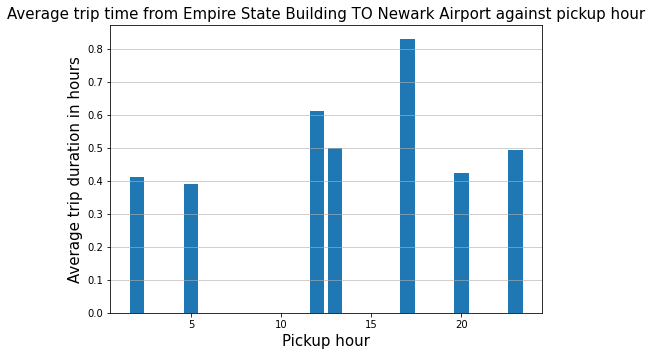

In [175]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(pickup_hours_Newark, average_trip_time_Newark)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Pickup hour',fontsize=15)
plt.ylabel('Average trip duration in hours',fontsize=15)
plt.title('Average trip time from Empire State Building TO Newark Airport against pickup hour',fontsize=15)
plt.show()

### Comments:

The major difference is that there are always trips from Empire State Building to JFK Airport every hour. Whereas, this is not the case from Empire State Building to Newark Airport since some of the averages trip times in the second graph are zeros for several pickup hours. 